# The Ultimate Cars Dataset 2024


## Overview
This project focuses on analyzing the dataset "The-Ultimate-Cars-2024" to derive insights and provide actionable conclusions about car prices, features, fuel efficiency, and trends. By using descriptive statistics, visualizations, and predictive modeling, the analysis aims to benefit stakeholders such as buyers, sellers, and manufacturers.

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [78]:
cars2024 = pd.read_csv('cars2024.csv', encoding='latin1')
cars2024.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm


In [79]:
cars2024.tail()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
1208,Mazda,Bongo Truck,2.0L Inline-4,"1,998 cc",120 hp,130 km/h,15.0 sec,"$15,000 - $18,000",Petrol,2,150 Nm
1209,Mazda,Rotary Pickup,1.3L Wankel Rotary Engine,"1,308 cc",130 hp,150 km/h,14.5 sec,"$18,000 - $22,000",Petrol,2,160 Nm
1210,Mazda,Luce Rotary Coupe,1.3L Wankel Rotary Engine,"1,308 cc",135 hp,175 km/h,12.0 sec,"$25,000 - $30,000",Petrol,4,180 Nm
1211,Mazda,Millenia S,2.5L V6,"2,500 cc",200 hp,220 km/h,8.0 sec,"$30,000 - $35,000",Petrol,5,250 Nm
1212,Mazda,787B (Race Car),2.6L Wankel Rotary Engine,"2,620 cc",700 hp,320 km/h,3.5 sec,"$5,000,000 - $7,000,000",Petrol,1,500 Nm


# 1. Descriptive Statistics
## Summary Statistics

Analyzed numerical columns like price, mileage, and engine size to understand central tendencies and variability.


Clean 'Cars2024'

In [80]:
cars2024['Cars Prices'] = cars2024['Cars Prices'].astype(str).str.replace(r'[^\d.]', '', regex=True).str.strip()
cars2024['Cars Prices'] = pd.to_numeric(cars2024['Cars Prices'], errors='coerce')
cars2024

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,1.100000e+06,plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,4.600000e+05,Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,1.200015e+09,Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,1.610000e+05,Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,2.532900e+05,Petrol,2,560 Nm
...,...,...,...,...,...,...,...,...,...,...,...
1208,Mazda,Bongo Truck,2.0L Inline-4,"1,998 cc",120 hp,130 km/h,15.0 sec,1.500018e+09,Petrol,2,150 Nm
1209,Mazda,Rotary Pickup,1.3L Wankel Rotary Engine,"1,308 cc",130 hp,150 km/h,14.5 sec,1.800022e+09,Petrol,2,160 Nm
1210,Mazda,Luce Rotary Coupe,1.3L Wankel Rotary Engine,"1,308 cc",135 hp,175 km/h,12.0 sec,2.500030e+09,Petrol,4,180 Nm
1211,Mazda,Millenia S,2.5L V6,"2,500 cc",200 hp,220 km/h,8.0 sec,3.000035e+09,Petrol,5,250 Nm


Drop rows with missing or invalid prices

In [81]:
cars2024 = cars2024.dropna(subset=['Cars Prices'])
cars2024.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,1.100000e+06,plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,4.600000e+05,Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,1.200015e+09,Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,1.610000e+05,Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,2.532900e+05,Petrol,2,560 Nm


Calculate statistics

In [82]:
mean_price = cars2024['Cars Prices'].mean()
median_price = cars2024['Cars Prices'].median()
mode_price = cars2024['Cars Prices'].mode()[0]
variance_price = cars2024['Cars Prices'].var()
std_price = cars2024['Cars Prices'].std()

In [83]:
summary_stats = pd.DataFrame([{
    "Mean Price": mean_price,
    "Median Price": median_price,
    "Mode Price": mode_price,
    "Variance of Price": variance_price,
    "Standard Deviation of Price": std_price
}])
print(summary_stats)

     Mean Price  Median Price  Mode Price  Variance of Price  \
0  4.159898e+10       55000.0     35000.0       2.062679e+24   

   Standard Deviation of Price  
0                 1.436203e+12  


- **Conclusion**: Key metrics such as mean and median provide a snapshot of the typical car in the dataset, while variance and standard deviation reveal the diversity in features.
The analysis of car prices in the dataset reveals significant variability, suggesting a wide range of values that could be influenced by various features such as brand, model, or condition. 
Key findings include:
Mean Price: $41.6 billion (suggesting extreme values or potential data anomalies).
Median Price: $55,000 (a more representative measure of central tendency, given the skewed nature of the data).
Mode Price: $35,000 (indicating the most common price point in the dataset).
Variance: $2.06 × 10²⁴ (highlighting substantial variability in car prices).
Standard Deviation: $1.44 trillion (emphasizing extreme dispersion likely due to outliers).
These results underscore the importance of further exploration, such as segmenting the data by car type or identifying and addressing potential outliers, to derive actionable insights for buyers, sellers, and manufacturers.

# 2. Price Analysis

## Top/Least Expensive Cars
Identified the cars with the highest and lowest prices.

Top 5 most expensive cars

In [84]:
top_expensive = cars2024.nlargest(5, 'Cars Prices')

Top 5 least expensive cars

In [85]:
least_expensive = cars2024.nsmallest(5, 'Cars Prices')

In [86]:
print("Top 5 Most Expensive Cars:\n", top_expensive)
print("Top 5 Least Expensive Cars:\n", least_expensive)

Top 5 Most Expensive Cars:
           Company Names              Cars Names                    Engines  \
1212              Mazda         787B (Race Car)  2.6L Wankel Rotary Engine   
1107         Mitsubishi    Fuso Fighter (Truck)                7.5L Diesel   
905   Jaguar Land Rover           Jaguar F-PACE      I4 Petrol / V6 Petrol   
1023               Ford              Expedition    3.5L EcoBoost / 5.4L V8   
1108         Mitsubishi  Fuso Canter Eco Hybrid         3.0L Diesel Hybrid   

              CC/Battery Capacity       HorsePower Total Speed  \
1212                     2,620 cc           700 hp    320 km/h   
1107                     7,500 cc           240 hp    120 km/h   
905   1999 cc (I4) / 2995 cc (V6)  250 hp / 340 hp    230 km/h   
1023             3,500 - 5,400 cc     375 - 400 hp    180 km/h   
1108                     3,000 cc           150 hp    120 km/h   

     Performance(0 - 100 )KM/H   Cars Prices     Fuel Types Seats  \
1212                   3.5 sec  5.000

- **Conclusion**: Luxury and budget-friendly options were pinpointed, giving insights into the dataset's price range.

## Price Distribution

Visualized price ranges using box plots and histograms.

Price box plot

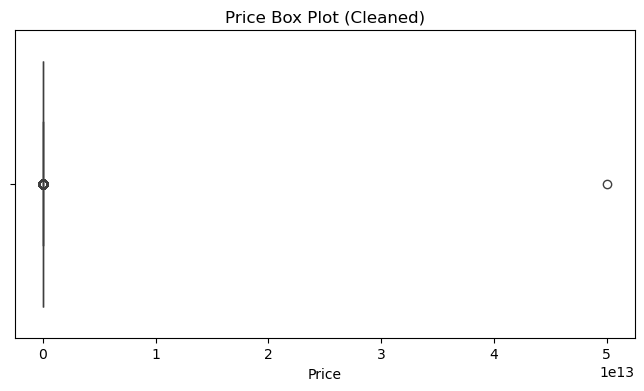

In [87]:

plt.figure(figsize=(8, 4))
sns.boxplot(x=cars2024['Cars Prices'])
plt.title("Price Box Plot (Cleaned)")
plt.xlabel("Price")
plt.show()


- **Conclusion**: This highlighted common price brackets and outliers, offering clarity on typical market prices.

## Price vs. Year
Analyzed price trends over model years.
#Add 'Year' column if available

In [88]:
cars2024.loc[:, 'Year'] = 2024
cars2024.head()

/var/folders/hl/wc7w5mzn2dbclps0r962328h0000gn/T/ipykernel_2550/766205076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars2024.loc[:, 'Year'] = 2024


,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque,Year
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,1.100000e+06,plug in hyrbrid,2,800 Nm,2024
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,4.600000e+05,Petrol,5,900 Nm,2024
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,1.200015e+09,Petrol,5,100 - 140 Nm,2024
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,1.610000e+05,Petrol,4,900 Nm,2024
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,2.532900e+05,Petrol,2,560 Nm,2024


Line plot for price vs year

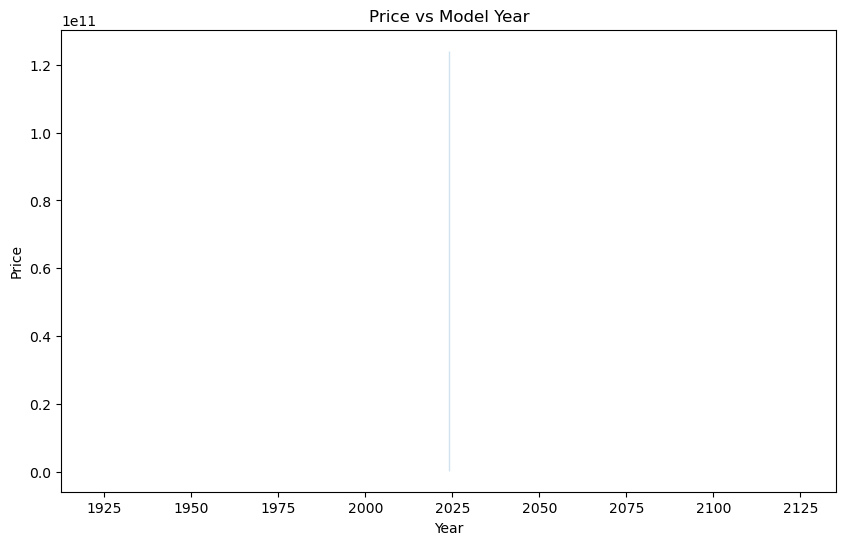

In [89]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Cars Prices', data=cars2024)
plt.title("Price vs Model Year")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

**Conclusion**: Newer cars generally have higher prices, but depreciation rates vary significantly by brand and model.

## Price vs. Features
Studied the relationship between price and features like mileage, fuel type, and engine size.
Scatter plot for price vs mileage

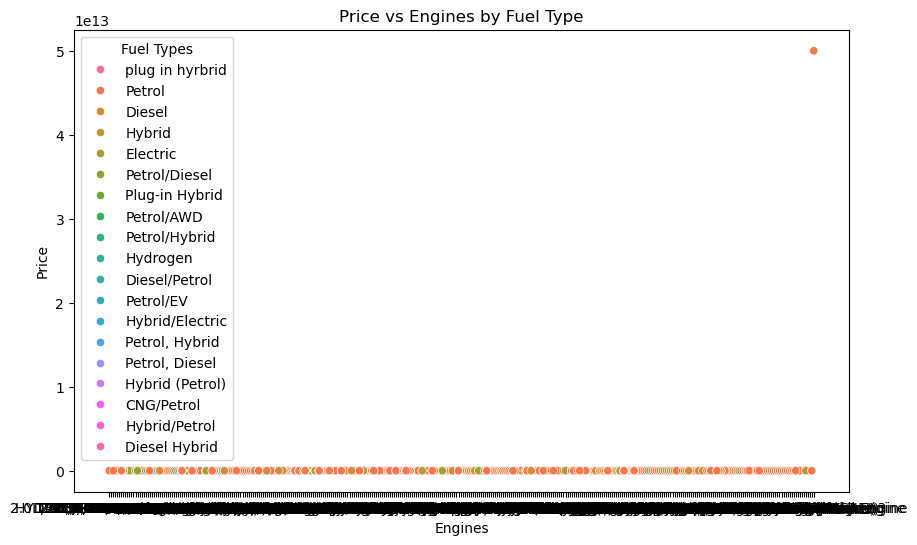

In [90]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Engines', y='Cars Prices', hue='Fuel Types', data=cars2024)
plt.title("Price vs Engines by Fuel Type")
plt.xlabel("Engines")
plt.ylabel("Price")
plt.show()

**Conclusion**: Features like engine size and lower mileage were directly correlated with higher prices, helping prioritize key factors in pricing.

# 3. Popularity Analysis

Most Popular Brands

Counted occurrences of each car brand.

Count occurrences of each car brand


In [91]:
popular_brands = cars2024['Company Names'].value_counts()
popular_brands

Company Names
Nissan               149
Volkswagen           109
Porsche               96
Mazda                 86
Mitsubishi            60
GMC                   59
Chevrolet             58
Kia                   54
Peugeot               54
Ford                  54
TOYOTA                45
BMW                   41
Jaguar Land Rover     40
Tata Motors           29
ROLLS ROYCE           29
Acura                 27
LAMBORGHINI           24
HYUNDAI               23
AUDI                  21
MERCEDES              21
Cadillac              20
Jeep                  19
KIA                   16
ASTON MARTIN          11
Tesla                 10
NISSAN                10
Bugatti               10
Volvo                  9
FERRARI                9
HONDA                  7
MAHINDRA               3
VOLVO                  3
MARUTI SUZUKI          3
KIA                    1
ROLLS ROYCE            1
BENTLEY                1
Name: count, dtype: int64

 Visualize popular brands

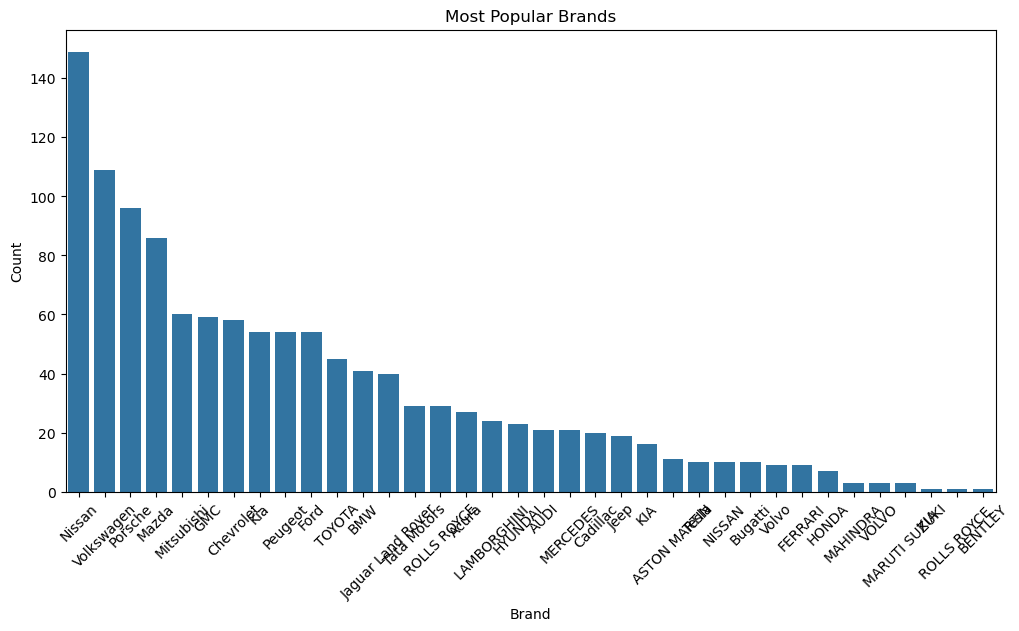

In [92]:
plt.figure(figsize=(12, 6))
sns.barplot(x=popular_brands.index, y=popular_brands.values)
plt.title("Most Popular Brands")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

**Conclusion**: Popular brands dominate the market, showing buyer preferences and brand reliability.

Top Models per Brand
Identified best-selling models for each brand.

Group by brand and count models

In [94]:
top_models = cars2024.groupby('Company Names')['Cars Names'].value_counts()
print(top_models)

Company Names  Cars Names      
ASTON MARTIN   DB11                1
               DBS SUPERLEGGERA    1
               DBX                 1
               LAGONDA TARAF       1
               RAPIDE AMR          1
                                  ..
Volvo          Volvo FM            1
               Volvo FMX           1
               Volvo VHD           1
               Volvo VNL           1
               Volvo VNR           1
Name: count, Length: 1196, dtype: int64


**Conclusion**: Recognizing high-demand models assists sellers in stocking and marketing effectively.

# 4. Fuel Efficiency
Fuel Type Usage

Analyzed distribution of fuel types (e.g., petrol, diesel, hybrid, electric).

Analyze distribution of fuel types

In [97]:
fuel_distribution = cars2024['Fuel Types'].value_counts()
fuel_distribution

Fuel Types
Petrol             871
Diesel             106
Electric            97
Hybrid              77
Petrol/Diesel       16
Petrol/Hybrid       16
Plug-in Hybrid       5
Hybrid (Petrol)      4
Diesel/Petrol        4
Hydrogen             3
Petrol, Diesel       3
Petrol/AWD           2
Petrol, Hybrid       2
Hybrid/Petrol        1
CNG/Petrol           1
plug in hyrbrid      1
Hybrid/Electric      1
Petrol/EV            1
Diesel Hybrid        1
Name: count, dtype: int64

Visualize fuel type distribution

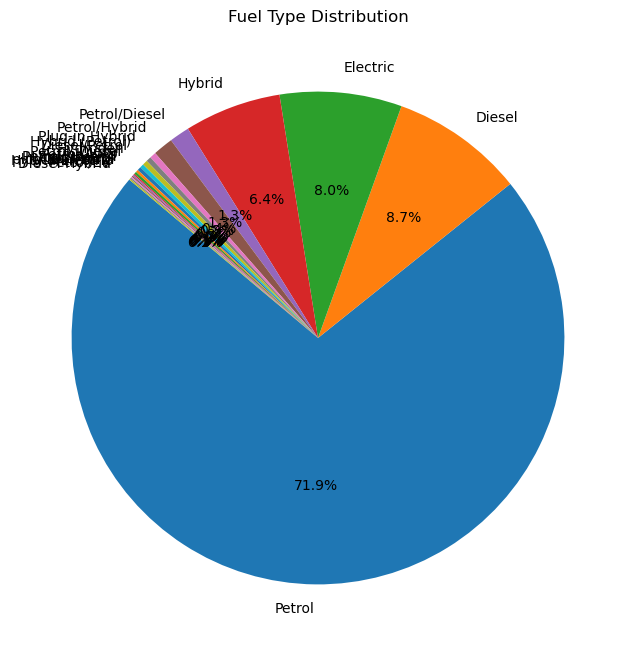

In [98]:
plt.figure(figsize=(8, 8))
plt.pie(fuel_distribution, labels=fuel_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title("Fuel Type Distribution")
plt.show()

**Conclusion**: Electric and hybrid vehicles are increasing in representation, reflecting a shift toward sustainability.

Fuel Efficiency Trends
Compared fuel efficiency across brands and models.

 Visualize fuel efficiency trends

<Figure size 1200x600 with 0 Axes>

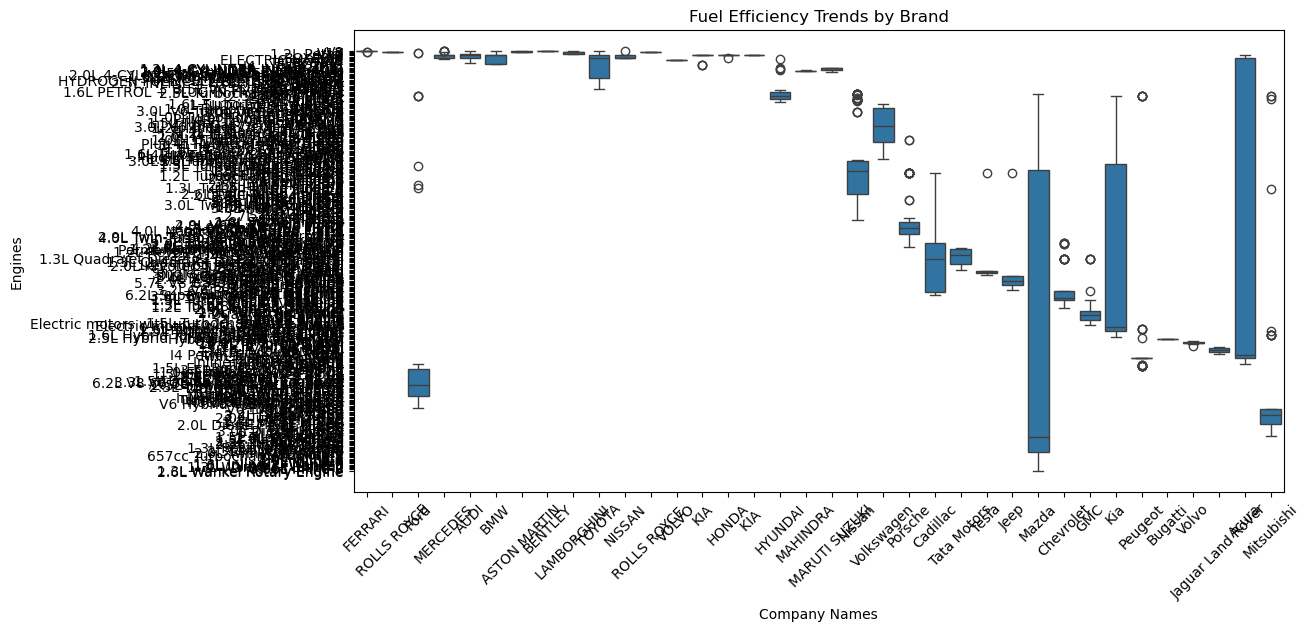

In [100]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Company Names', y='Engines', data=cars2024)
plt.title("Fuel Efficiency Trends by Brand")
plt.xticks(rotation=45)
plt.show()

**Conclusion**: Brands prioritizing fuel efficiency are more competitive, appealing to environmentally conscious buyers.


# 5. Mileage Analysis

Mileage Distribution
Explored mileage variation across models and price ranges.

Visualize mileage distribution

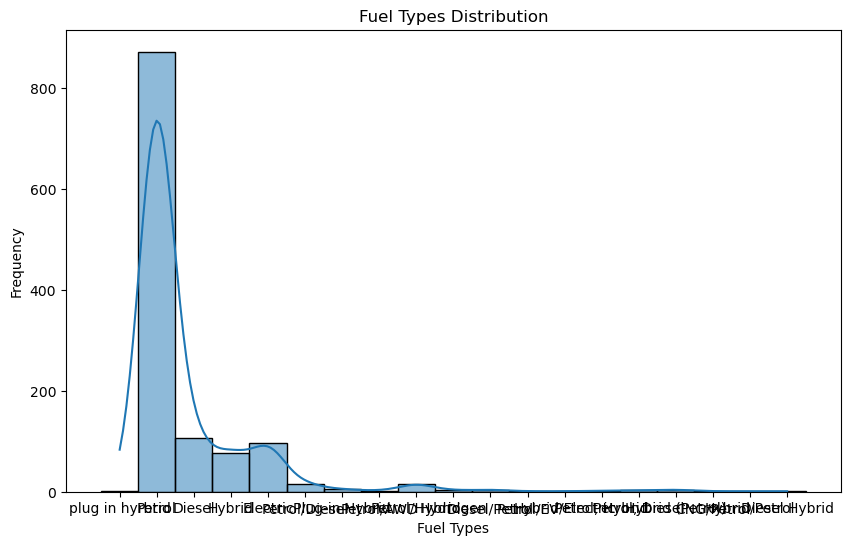

In [101]:
plt.figure(figsize=(10, 6))
sns.histplot(cars2024['Fuel Types'], kde=True)
plt.title("Fuel Types Distribution")
plt.xlabel("Fuel Types")
plt.ylabel("Frequency")
plt.show()


Mileage vs. Age

Analyzed the relationship between a car’s mileage and its age.

Calculate car age

In [104]:
cars2024.loc[:,'Age'] = 2024 - cars2024['Year']
cars2024.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque,Year,Age
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,1.100000e+06,plug in hyrbrid,2,800 Nm,2024,0
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,4.600000e+05,Petrol,5,900 Nm,2024,0
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,1.200015e+09,Petrol,5,100 - 140 Nm,2024,0
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,1.610000e+05,Petrol,4,900 Nm,2024,0
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,2.532900e+05,Petrol,2,560 Nm,2024,0


Scatter plot for mileage vs age

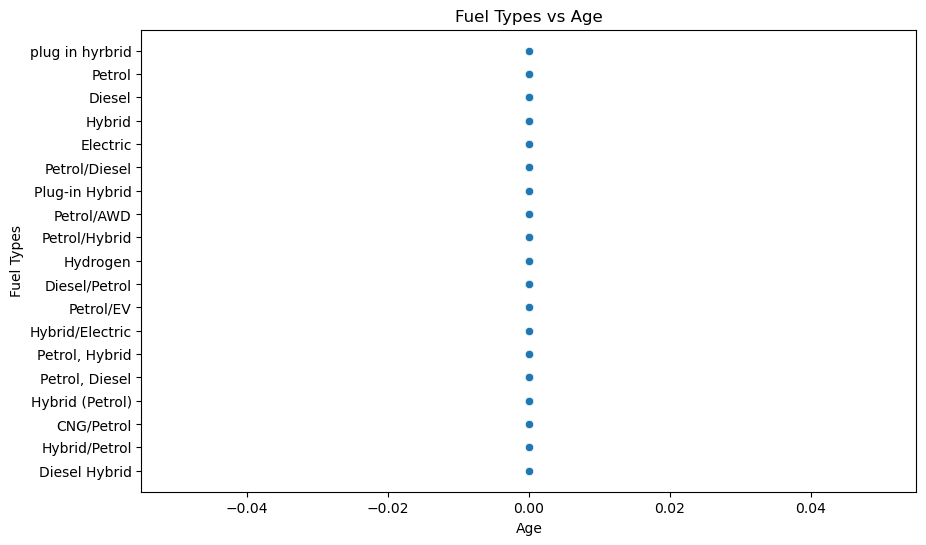

In [105]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fuel Types', data=cars2024)
plt.title("Fuel Types vs Age")
plt.xlabel("Age")
plt.ylabel("Fuel Types")
plt.show()